In [151]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import norm
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot
import pylab


# Random  matrix (the off-diagonal from normal distrbution)


- We genrate random arreyes for the alpha's values. 

- We choose positive points for off_daigonal.

- We set the diagonal to 1.

- Our model is commpetition interaction so all the elelment of our matrix becomes (-). 

- We used this matrix as system of equations and we solve it to find the fixed points.

- From the fixed points  we choose the positve points.


In [180]:

counter = 100
n=3     #the size of the matrix
solution =[]
alpha_matrix = [] 
b = np.ones(n)
i=0
while len(solution)< counter:
    A1=np.random.normal(0,1, n**2) #The mean of the varuable is 0 and std = 1
    #print(A1)         #random array
    A1 = A1.reshape(n,n) #reshape to matrix
    A1[np.diag_indices_from(A1)]=1
    if np.all(A1>0):
        N=np.linalg.solve(A1 ,b) #solve the system of the linear equations to get the fixed points
        if np.all(N>0):
            alpha_matrix.append(A1)
            solution.append(N)
    i+=1
print (len(solution)) 
print(len(alpha_matrix))
print ("Out of the ", i," random matrices only",len(alpha_matrix)," satisfy all the conditions.")

100
100
Out of the  20947  random matrices only 100  satisfy all the conditions.


## The matrices that have been used:
#### 1- alpha matrix.
#### 2- Jacobain matrix.
#### 3- Encounter matrix.
#### 4- Competition matrix.

In [181]:
for i in range(len(alpha_matrix)):
    alpha_matrix[i] = -alpha_matrix[i]
    m = alpha_matrix
#print(m[0])


alpha=[]
for k in range(len(alpha_matrix)):
    lam=LA.eigvals(alpha_matrix[k])
    M=max(lam.real)
    #print(M)
    alpha.append(M)
#print(len(MM))
#print(alpha_matrix[0])
#print(solution)
y=np.zeros(len(alpha))
#plt.title("Eigenvalues domian for the alpha matrix")
#plt.plot(alpha,y,'*g')
negv = []
for n in range (len(alpha)):
    if alpha[n]<0:
        negv.append(alpha[n])
#print(min(negv))
print(",,,,,,,")
print("The neg Evalue of Alpha matrix",len(negv))
print(min(alpha),max(alpha))
#print(len(Jacobian))

rate = [1,1,1]
#rate = [0.1,0.1,0.1]
#rate = [0.1,0.1,0.1]
Jacobian  = []
for i in range(0,len(solution)):
    for j in range(2):
        alpha11 = alpha_matrix[i][j][0]
        alpha12 = alpha_matrix[i][j-2][0]
        alpha13 = alpha_matrix[i][j-1][0]
        alpha21 = alpha_matrix[i-2][j][1]
        alpha22 =  alpha_matrix[i-2][j-2][1]
        alpha23 = alpha_matrix[i-2][j-1][1]
        alpha31 = alpha_matrix[i-1][j][2]
        alpha32 = alpha_matrix[i-1][j-2][2]
        alpha33 = alpha_matrix[i-1][j-1][2]
#N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
#N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)

    Jacobian1 = [[-2*rate[0]*solution[i][0] + rate[0]*(1 + alpha12*solution[i][1] + alpha13*solution[i][2]) ,  
                 rate[0]*alpha12*solution[i][0] , alpha13*rate[0]*solution[i][0]],
                [alpha21*rate[1]*solution[i][1] ,  -2*rate[1]*solution[i][1] + rate[1]*(1 + alpha21*solution[i][0] + alpha23*solution[i][2]) 
                 , alpha23*rate[1]*solution[i][1]],
                [alpha31*rate[2]*solution[i][2] ,  rate[2]*alpha32*solution[i][2] 
                 , -2*rate[2]*solution[i][2] + rate[2]*(1 + alpha31*solution[i][0] + alpha32*solution[i][1])]]
    Jacobian.append(Jacobian1)


Jaco=[]
for k in range(len(Jacobian)):
        lam=LA.eigvals(Jacobian[k])
        Max_real_point=max(lam.real)
        #print(M)
        Jaco.append(Max_real_point)
        #print(Max_real_point)
#print(len(MMa))
y=np.zeros(len(Jaco))
#plt.plot(Jaco,y,'*g')
#print(len(Jacobian))
  
#plt.title("Eigenvalues domian for the Jacobian matrix")
    
neg = []
for n in range (len(Jaco)):
    if Jaco[n]<0:
        neg.append(Jaco[n])
print(",,,,,,,")
print("The neg Evalues of J matrix",len(neg))
#print(max(neg))
print(min(Jaco),max(Jaco))


Encounter = []
#r_i = np.ones(3) 
Encounter = []
for i in range(0,len(solution)):
    N1N1 = solution[i][0]**2
    N1N2 = solution[i][0]*solution[i][1]
    N2N2 = solution[i][1]**2
    N3N3 = solution[i][2]**2
    N1N3 = solution[i][0]*solution[i][2]
    N2N3 = solution[i][1]*solution[i][2]
    #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
    #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)
    Encounter1 = [[-N1N1 ,  -N1N2 , -N1N3],
            [ -N1N2 , -N2N2 , -N2N3] , [ -N1N3 , -N2N3 , -N3N3] ]
    Encounter.append(Encounter1)
#print(Encounter)

Encount=[]
#for k in range(len(Encounter)):
for n in range(len(Encounter)):
    Eigenvalue = LA.eigvals(Encounter) # the eigenvalues of the Jacobain matrix
    Maxx_real = max(Eigenvalue[n].real)
    Encount.append(Maxx_real)
#print(mmax[0])
y=np.zeros(len(Encount))
#plt.plot(mmax,y,'*g')
#plt.title("Eigenvalues domian for the encounter matrix")
negve = []
for n in range (len(Encount)):
    if Encount[n]<0:
        negve.append(Encount)
print(",,,,,,,")
print("The neg Evalues of E matrix",len(negve))
print(min(Encount),max(Encount))


com2 = []
for i in range(0,len(solution)):
    N1N1 = solution[i][0]**2
    N1N2 = solution[i][0]*solution[i][1]
    N2N2 = solution[i][1]**2
    N3N3 = solution[i][2]**2
    N1N3 = solution[i][0]*solution[i][2]
    N2N3 = solution[i][1]*solution[i][2]
    #N1 = (alpha12 - 1 )/(alpha21*alpha12 - 1)
    #N2 = (alpha21 - 1 )/(alpha21*alpha12 - 1)
    for i in range(0,len(solution)):
        for j in range(1):
            alpha11 = alpha_matrix[i][j][0]
            alpha12 = alpha_matrix[i][j-2][0]
            alpha13 = alpha_matrix[i][j-1][0]
            alpha21 = alpha_matrix[i-2][j][1]
            alpha22 =  alpha_matrix[i-2][j-2][1]
            alpha23 = alpha_matrix[i-2][j-1][1]
            alpha31 = alpha_matrix[i-1][j][2]
            alpha32 = alpha_matrix[i-1][j-2][2]
            alpha33 = alpha_matrix[i-1][j-1][2]
    com1 =  [[alpha11*N1N1 ,  alpha12*N1N2 , alpha13*N1N3],
            [ alpha21*N1N2 , alpha22*N2N2 , alpha23*N2N3] , [alpha31*N1N3 , alpha32*N2N3 , alpha33*N3N3] ]
    com2.append(com1)
#print(Encounter)

Com=[]
#for k in range(len(Encounter)):
for n in range(len(com2)):
    Eigenvalu = LA.eigvals(com2) # the eigenvalues of the Jacobain matrix
    Maxx_reeal = max(Eigenvalu[n].real)
    Com.append(Maxx_reeal)
#print(len(mmaxCom))
y=np.zeros(len(Com))
#plt.title("Eigenvalues domian for the Encounter matrix")
#plt.plot(Com,y,'*g')
#print(len(Jacobian))

negev = []
for n in range (len(Com)):
    if Com[n]<0:
        negev.append(Com)
print(",,,,,,,")
print("The neg Evalues of Com matrix",len(negev))
print(min(Com),max(Com))

,,,,,,,
The neg Evalue of Alpha matrix 57
-0.835107068831 1.41873912421
,,,,,,,
The neg Evalues of J matrix 62
-0.980257553708 0.732963021464
,,,,,,,
The neg Evalues of E matrix 11
-2.45533189447e-17 1.44833936794e-16
,,,,,,,
The neg Evalues of Com matrix 100
-0.274878201509 -1.31431214492e-07


## Box and violin plot

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


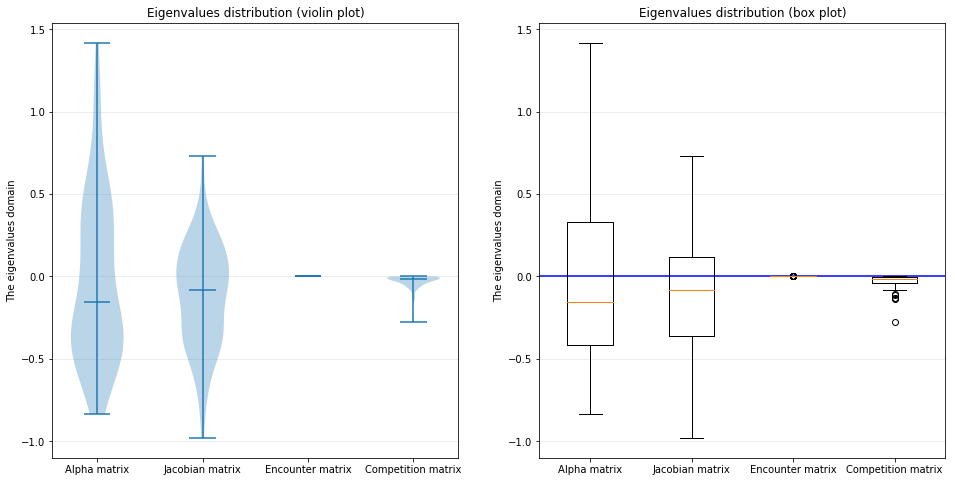

In [182]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
# our data set
all_data = [alpha,Jaco,Encount,Com]

# the violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
plt.legend(loc=2)
z = np.arange(0,100)
y=np.zeros(len(alpha))
plt.plot(z,y,'-b')
axes[0].set_title('Eigenvalues distribution (violin plot)')
axes[0].set_axisbelow(True)
axes[0].yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
axes[0].set_ylabel('The eigenvalues domain')

# the box plot
axes[1].boxplot(all_data)
axes[1].set_title('Eigenvalues distribution (box plot)')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    #ax.set_xlabel('xlabel')
    #ax.set_ylabel('ylabel')
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['Alpha matrix', 'Jacobian matrix', 'Encounter matrix', 'Competition matrix'])
#yticklabels=['']
ax.set_axisbelow(True)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
ax.set_ylabel('The eigenvalues domain')
plt.show()

## The correlation graph

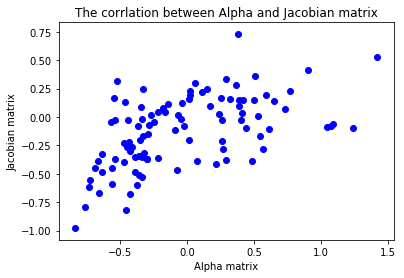

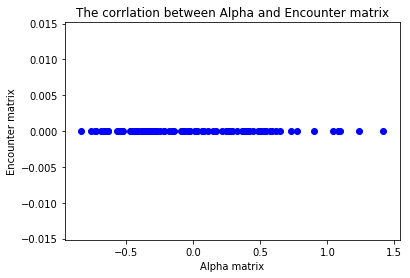

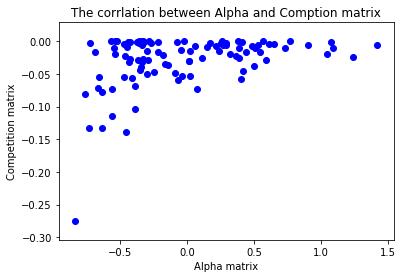

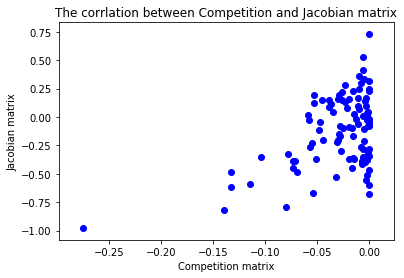

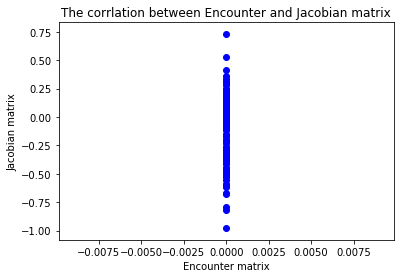

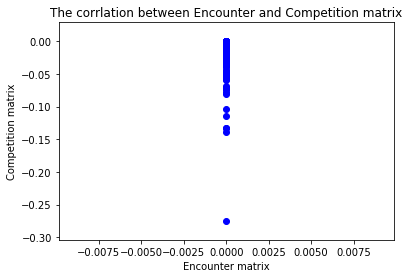

In [183]:
# the data set
all_data = [alpha,Jaco,Encount,Com]


x1 = [alpha]
y1 = [Jaco]

x2 = [alpha]
y2 = [Encount]

x3 = [alpha]
y3 = [Com]

x4 = [Com]
y4 = [Jaco]

x5 = [Encount]
y5 = [Jaco]

x6 = [Encount]
y6 = [Com]


for i in range(len(x1)):
    plt.scatter(x1[i], y1[i], c = 'blue')
plt.title('The corrlation between Alpha and Jacobian matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for k in range(len(x2)):
     plt.scatter(x2[k], y2[k], c = 'blue')   
plt.title('The corrlation between Alpha and Encounter matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Encounter matrix')
plt.show()

 
for n in range(len(x3)):
     plt.scatter(x3[n], y3[n], c = 'blue')   
plt.title('The corrlation between Alpha and Comption matrix')
plt.xlabel('Alpha matrix')
plt.ylabel('Competition matrix')
plt.show()
 
for ki in range(len(x4)):
     plt.scatter(x4[ki], y4[ki], c = 'blue')   
plt.title('The corrlation between Competition and Jacobian matrix')
plt.xlabel('Competition matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for o in range(len(x5)):
     plt.scatter(x5[o], y5[o], c='b')   
plt.title('The corrlation between Encounter and Jacobian matrix')
plt.xlabel('Encounter matrix')
plt.ylabel('Jacobian matrix')
plt.show()

for ke in range(len(x6)):
     plt.scatter(x6[ke], y6[ke], c = 'blue')   
plt.title('The corrlation between Encounter and Competition matrix')
plt.xlabel('Encounter matrix')
plt.ylabel('Competition matrix')
plt.show()



### t-test calculations 

In [184]:
l = [alpha,Jaco,Encount,Com]
m = []
for i in range(len(l)):
    meanl1 = sum(l[i])/len(l[i]) #copute the mean for all variablees
    m.append(meanl1)
print(m)

sigma1 = 0   
for j in range(len(alpha)):
    sigma1 += (alpha[j]-m[0])**2 #standard divation for the alpha matrix
s1 = sigma1/(len(alpha)-1)
#print(s1)
print("STD for alpha matrix = ",sigma1)

sigma2 = 0   
for j in range(len(Jaco)):
    sigma2 += (Jaco[j]-m[1])**2 #standard divation for the  Jacobian matrix
s2 = sigma2/(len(Jaco)-1)
#print(s2)
print("STD for Jacobian matrix = ",sigma2 )

sigma3 = 0   
for j in range(len(Encount)):
    sigma3 += (Encount[j]-m[2])**2 #standard divation for the encounter matrix
s3 = sigma3/(len(Encount)-1)
#print(s3)
print("STD for Encounter matrix = ",sigma3 )

sigma4 = 0   
for j in range(len(Com)):
    sigma4 += (Com[j]-m[0])**2 #standard divation for the commpetition matrix
s4 = sigma4/(len(Com)-1)
#print(s4)
print("STD for commpetition matrix = ",sigma4 )

            #standard error for all pairs of the matrices

SE1 = (s1/100+s2/100)**(1/2)  
print("SE for alpha and Jacobian matrix  = ",SE1)


SE2 = (s1/100+s3/100)**(1/2)
print("SE for alpha and Encounter matrix = ",SE2)


SE3 = (s1/100+s4/100)**(1/2)
print("SE for alpha and Encounter matrix = ",SE3)



SE4 = (s2/100+s3/100)**(1/2)
print("SE for Jacobian and Encounter matrix = ", SE4 )

SE5 = (s2/100+s4/100)**(1/2)
print("SE for Jacobian and competition matrix = ",SE5)

SE6 = (s3/100+s4/100)**(1/2)
print("SE for encounter and competition matrix= ",SE6)

[-0.030530575439523627, -0.12102809214887113, 2.1366071409849909e-17, -0.028673992394342637]
STD for alpha matrix =  24.6019273517
STD for Jacobian matrix =  9.66219349788
STD for Encounter matrix =  1.40115366453e-31
STD for commpetition matrix =  0.158719296845
SE for alpha and Jacobian matrix  =  0.0588304539166
SE for alpha and Encounter matrix =  0.0498502072898
SE for alpha and Encounter matrix =  0.0500107530341
SE for Jacobian and Encounter matrix =  0.0312406648649
SE for Jacobian and competition matrix =  0.031496212366
SE for encounter and competition matrix=  0.00400402949622


In [185]:
l = [alpha,Jaco,Encount,Com]
t1 = (m[0] - m[1])/SE1
t2 = (m[0] - m[2])/SE2
t3 = (m[0] - m[3])/SE3
t4 = (m[3] - m[1])/SE4
t5 = (m[2] - m[1])/SE5
t6 = (m[3] - m[2])/SE6
print("t-test value of the Alpha and Jacobian = " , t1)
print("t-test value of the Alpha and encounter = " , t2)
print("t-test value of the Alpha and competition = " , t3)
print("t-test value of the competition and Jacobian = " , t4)
print("t-test value of the encounter and Jacobian = " , t5)
print("t-test value of the encounter and competition = " , t6)

t-test value of the Alpha and Jacobian =  1.53827670338
t-test value of the Alpha and encounter =  -0.612446308639
t-test value of the Alpha and competition =  -0.0371236770603
t-test value of the competition and Jacobian =  2.95621428526
t-test value of the encounter and Jacobian =  3.84262370162
t-test value of the encounter and competition =  -7.16128400688


In [186]:
d1 = (s1/100+s2/100)**2 / (((s1/100)**2)*(1/99)+(s2/100)**2*(1/99))
d2 = (s1/100+s3/100)**2 / (((s1/100)**2)*(1/99)+(s3/100)**2*(1/99))
d3 = (s1/100+s4/100)**2 / (((s1/100)**2)*(1/99)+(s4/100)**2*(1/99))
d4 = (s2/100+s3/100)**2 / (((s2/100)**2)*(1/99)+(s3/100)**2*(1/99))
d5 = (s2/100+s4/100)**2 / (((s2/100)**2)*(1/99)+(s4/100)**2*(1/99))
d6 = (s3/100+s4/100)**2 / (((s3/100)**2)*(1/99)+(s4/100)**2*(1/99))
print(d1)
print(d2)
print(d3)
print(d4)
print(d5)
print(d6)

166.371079494
99.0
100.277343533
99.0
102.251636694
99.0


/usr/local/lib/python3.4/dist-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


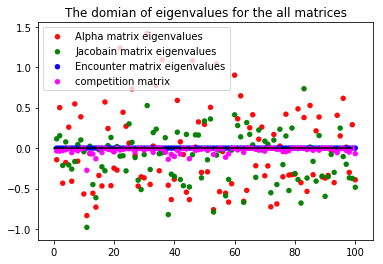

In [187]:
x = np.arange(1,101)
data = ((alpha,x),(Jaco,x),(Encount,x),(Com,x))
colors = ("red", "green", "blue" , "magenta")
groups = ("Alpha matrix eigenvalues", "Jacobain matrix eigenvalues", "Encounter matrix eigenvalues","competition matrix") 
 
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1, axisbg="1.0")
 
for data, color, group in zip(data, colors, groups):
    x,y = data
    ax.scatter(y,x, alpha=10, c=color, edgecolors='none', s=30,label = group)
 
    #plt.title('Matplot scatter plot')
plt.legend(loc=2)
z = np.arange(0,100)
y=np.zeros(len(alpha))
plt.title("The domian of eigenvalues for the all matrices")
plt.plot(z,y,'-k')
#print(len(Jacobian))

#plt.label(group)
plt.show()